In [1]:
import os
import sys
import cv2
import random
import math
import numpy as np
import skimage.io
import matplotlib
import matplotlib.pyplot as plt
import random

from mrcnn import utils
import mrcnn.model as modellib
from mrcnn import visualize

import coco
%matplotlib inline

if not os.path.join("mask_rcnn_coco.h5"):
    utils.download_trained_weights("mask_rcnn_coco.h5")

Using TensorFlow backend.


In [2]:
class InferenceConfig(coco.CocoConfig):
    # Set batch size to 1 since we'll be running inference on
    # one image at a time. Batch size = GPU_COUNT * IMAGES_PER_GPU
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

config = InferenceConfig()
config.display()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                93
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE         

In [3]:
# Create model object in inference mode.
model = modellib.MaskRCNN(mode="inference", model_dir="logs", config=config)

# Load weights trained on MS-COCO
model.load_weights("mask_rcnn_coco.h5", by_name=True)



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
box_ind is deprecated, use box_indices instead


Instructions for updating:
Use `tf.cast` instead.


In [4]:
class_names = ['BG', 'person', 'bicycle', 'car', 'motorcycle', 'airplane',
               'bus', 'train', 'truck', 'boat', 'traffic light',
               'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird',
               'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear',
               'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie',
               'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
               'kite', 'baseball bat', 'baseball glove', 'skateboard',
               'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup',
               'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
               'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
               'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed',
               'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote',
               'keyboard', 'cell phone', 'microwave', 'oven', 'toaster',
               'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors',
               'teddy bear', 'hair drier', 'toothbrush']

In [5]:
def drawbb(img,clas,coordinates):
    x1,y1,x2,y2=coordinates
    color=(random.randint(0,255),random.randint(0,255),random.randint(0,255))
    cv2.rectangle(img,(x1,y1),(x2,y2), color, 2)
    cv2.putText(img, class_names[clas], (x1,y1), cv2.FONT_HERSHEY_SIMPLEX, 4, color, 2, cv2.LINE_AA)
    return img

In [6]:
def drawbbs(img, rois, class_ids):
    n=len(class_ids)
    for i in range(n):
        img=drawbb(img, class_ids[i],rois[i])
    return img

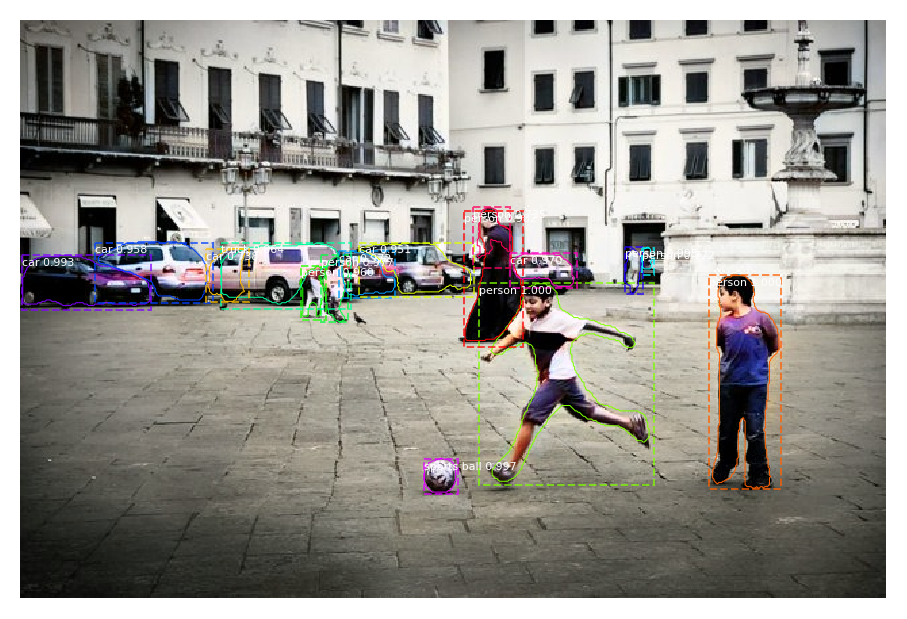

In [8]:
img=cv2.imread("index.jpeg")
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
result=model.detect([img], verbose=0)
r=result[0]
visualize.display_instances(img, r['rois'], r['masks'], r['class_ids'], 
                            class_names, r['scores'], show_mask=False)